In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, GaussianNoise
from tensorflow.keras import Model, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

### Data load

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/housing.csv'
df = pd.read_csv(url, delim_whitespace=True,header=None)

### Data shuffling and sampling

In [3]:
df = df.sample(frac=1.0,random_state=2)
dataset = df.values
X = dataset[:, :13]
Y = dataset[:, 13]
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


### Model structure: Basline model

In [4]:
def HouseModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu')(Inp)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Output = Dense(1, activation='linear')(Hidden3)

    return Model(Inp, Output)


### Experiment setting

In [29]:
Npatience = 50
Nepochs = 300
Nbatch = 20

### Model save directory setting

In [30]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)


### Model training

In [31]:
ModelSaveSameName = save_path+'HouseM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)
EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience)


House = HouseModel()
House.compile(loss=tf.losses.mse, optimizer='adam')

HistHouse = House.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs, batch_size=Nbatch,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/300
21/21 [==============================] - 0s 6ms/step - loss: 1899.0671 - val_loss: 208.0052

Epoch 00001: val_loss improved from inf to 208.00525, saving model to ./Results\HouseM.hdf5
Epoch 2/300
21/21 [==============================] - 0s 4ms/step - loss: 200.4589 - val_loss: 85.4029

Epoch 00002: val_loss improved from 208.00525 to 85.40295, saving model to ./Results\HouseM.hdf5
Epoch 3/300
21/21 [==============================] - 0s 3ms/step - loss: 85.0358 - val_loss: 58.4132

Epoch 00003: val_loss improved from 85.40295 to 58.41325, saving model to ./Results\HouseM.hdf5
Epoch 4/300
21/21 [==============================] - 0s 5ms/step - loss: 64.2337 - val_loss: 52.9147

Epoch 00004: val_loss improved from 58.41325 to 52.91471, saving model to ./Results\HouseM.hdf5
Epoch 5/300
21/21 [==============================] - 0s 4ms/step - loss: 69.1843 - val_loss: 52.1731

Epoch 00005: val_loss improved from 52.91471 to 52.17308, saving model to ./Results\HouseM.hdf5
Epoch 6/3

### Plot loss graphs

Text(0, 0.5, 'loss')

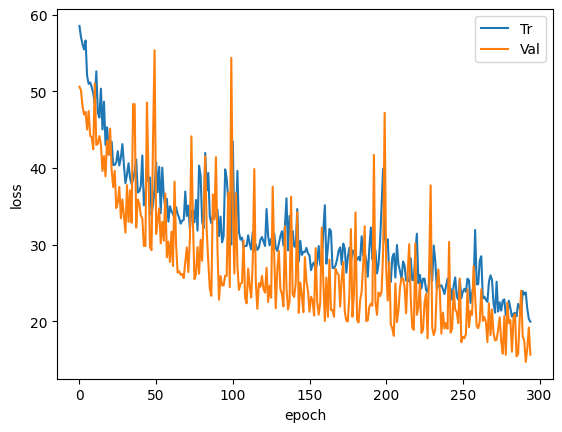

In [32]:
StartIDX = 5
plt.plot(HistHouse.history['loss'][StartIDX:], label='Tr')
plt.plot(HistHouse.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Competition model

In [47]:
L1L2 = regularizers.L1L2(l1=0.0005, l2=0.0005)
Drate = 0.1
Std = 0.1

def HouseCompModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu',kernel_regularizer=L1L2,bias_regularizer=L1L2)(Inp)
    Hidden1= GaussianNoise(Std)(Hidden1)
    #Hidden1= Dropout(Drate)(Hidden1)
    Hidden2 = Dense(12, activation='relu',kernel_regularizer=L1L2,bias_regularizer=L1L2)(Hidden1)
    Hidden2= GaussianNoise(Std)(Hidden2)
    #Hidden2= Dropout(Drate)(Hidden2)
    Hidden3 = Dense(8, activation='relu',kernel_regularizer=L1L2,bias_regularizer=L1L2)(Hidden2)
    Hidden3= GaussianNoise(Std)(Hidden3)
    Output = Dense(1, activation='linear',kernel_regularizer=L1L2,bias_regularizer=L1L2)(Hidden3)

    return Model(Inp, Output)

### Model training

In [48]:
ModelSaveSameName = save_path+'HouseComp.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience )

HouseComp = HouseCompModel()
HouseComp.compile(loss=tf.losses.mse, optimizer='adam')

HistHouseComp = HouseComp.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs , batch_size=Nbatch ,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/300
21/21 [==============================] - 1s 10ms/step - loss: 172.1721 - val_loss: 109.7394

Epoch 00001: val_loss improved from inf to 109.73944, saving model to ./Results\HouseComp.hdf5
Epoch 2/300
21/21 [==============================] - 0s 6ms/step - loss: 105.3898 - val_loss: 74.0164

Epoch 00002: val_loss improved from 109.73944 to 74.01637, saving model to ./Results\HouseComp.hdf5
Epoch 3/300
21/21 [==============================] - 0s 6ms/step - loss: 78.4838 - val_loss: 59.1838

Epoch 00003: val_loss improved from 74.01637 to 59.18380, saving model to ./Results\HouseComp.hdf5
Epoch 4/300
21/21 [==============================] - 0s 7ms/step - loss: 83.4376 - val_loss: 54.4087

Epoch 00004: val_loss improved from 59.18380 to 54.40869, saving model to ./Results\HouseComp.hdf5
Epoch 5/300
21/21 [==============================] - 0s 6ms/step - loss: 65.5610 - val_loss: 51.7967

Epoch 00005: val_loss improved from 54.40869 to 51.79673, saving model to ./Results\HouseComp

### Plot loss graphs

Text(0, 0.5, 'loss')

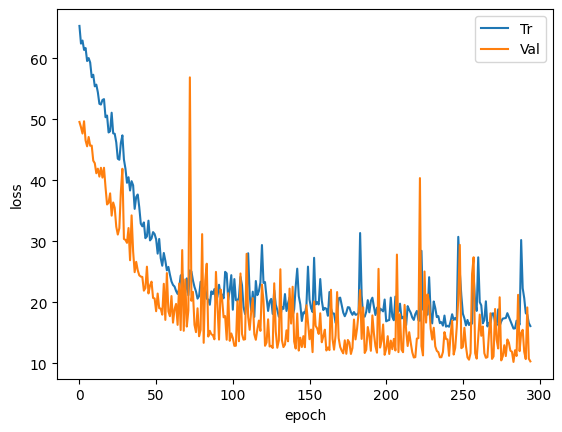

In [49]:
StartIDX = 5
plt.plot(HistHouseComp.history['loss'][StartIDX:], label='Tr')
plt.plot(HistHouseComp.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Plot true and predicted values and a linear regression model fit.¶

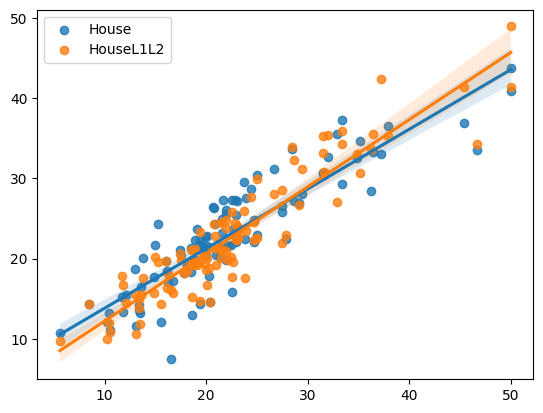

In [50]:
PredHouse =  House.predict(X_test, batch_size=100)
PredHouseL1L2 = HouseComp.predict(X_test, batch_size=100)

sns.regplot(x=Y_test, y=PredHouse, label='House')
sns.regplot(x=Y_test, y=PredHouseL1L2, label='HouseL1L2')
plt.legend()

### Comparison MSEs between base and competition models

In [51]:
House.evaluate(X_test, Y_test), HouseComp.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 10.2937


(15.67137336730957, 10.293679237365723)